# Introduction

Yulu is India’s leading micro-mobility service provider, offering electric shared mobility solutions to solve the challenges of urban congestion and pollution. With a mission to make daily commuting sustainable, affordable, and efficient, Yulu operates across several Indian cities, enabling solo travel through its user-friendly mobile app and strategically placed Yulu Zones. These zones are located near metro stations, bus stops, residential complexes, and corporate hubs to ease first- and last-mile connectivity.

However, Yulu has recently observed a significant decline in its revenue. To address this, the company has partnered with a consulting firm to identify and understand the key factors influencing the demand for its shared electric cycles. Understanding these factors will enable data-driven decision-making to optimize operations, refine marketing strategies, and improve overall service delivery.

# Problem Statement

Yulu is facing a notable dip in its revenue and wants to identify the key demand-driving factors for shared electric cycles in the Indian market. The objective is to:

- Understand how different environmental and temporal variables affect electric cycle demand.
- Evaluate whether user demand patterns differ on working days, across different seasons, and in varying weather conditions.
- Check interdependencies among predictor variables (such as weather and season).
  
This study serves dual purposes:
- **Strategic Expansion**: Yulu's expansion in the Indian market is a strategic initiative to grow its global presence. Understanding localized demand patterns is crucial for customizing services and scaling effectively.
- **Revenue Recovery**: Given the current revenue challenges, data-backed insights into demand drivers will allow Yulu to recalibrate its offerings and marketing efforts for higher engagement and profitability.

# Objective

The goal of this analysis is to explore the dataset provided and determine:
- Which variables are significant predictors of electric cycle demand.
- How well these variables explain the fluctuations in demand.
- The statistical relationships and dependencies between these variables.

The dataset includes attributes such as weather, season, temperature, humidity, working day, and holiday indicators, along with rental counts from both casual and registered users.

# Analysis Plan

To achieve our objectives, we will follow these steps:

1. **Exploratory Data Analysis (EDA)**
   - Understand the structure, data types, and statistical summaries of the dataset.
   - Perform univariate and bivariate analyses to explore individual variables and their relationships.

2. **Hypothesis Testing**
   - **2-Sample T-Test**: To check if the number of cycles rented differs between working days and non-working days.
   - **ANOVA Test**: To evaluate if the number of cycles rented varies significantly across:
     - Different weather conditions
     - Different seasons
   - **Chi-Square Test**: To determine if there is a dependency between weather and season.

3. **Assumption Checks**
   - Check for normality and homogeneity of variance using visual tools (Histogram, Q-Q plot) and statistical tests (Shapiro-Wilk, Levene’s test).

4. **Statistical Inference**
   - Set appropriate null and alternative hypotheses.
   - Set a significance level (α).
   - Compute test statistics and p-values.
   - Draw conclusions based on hypothesis test results.

This analysis aims to derive actionable insights and highlight key predictors of demand to support Yulu's operational and strategic decision-making.


In [ ]:
# Importing essential libraries
import numpy as np                     # For numerical operations
import pandas as pd                    # For data manipulation and analysis
import matplotlib.pyplot as plt        # For basic visualizations
import seaborn as sns                  # For enhanced data visualization
from scipy import stats                # For statistical tests

# Mounting Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/bike_sharing.csv')

# Displaying the first 5 rows of the dataset to get an initial understanding
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Checking the shape of the dataset
print("Shape of the dataset (rows, columns):", df.shape)

# Displaying information about data types, non-null values, and memory usage
print("\nDataset Info:")
df.info()

# Checking for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Shape of the dataset (rows, columns): (10886, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB

Missing Values in Each Column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual     

## Dataset Structure and Data Types

### Shape of the Dataset
- The dataset contains **10,886 rows** and **12 columns**.

### Column Data Types and Interpretation

The dataset consists of the following columns:

1. **datetime**:
   - **Data Type**: Object (string)
   - **Interpretation**: Represents the timestamp of the bike rental, capturing the date and time.
   - **Action**: Convert this column to `datetime` to facilitate extraction of time-related features such as hour, day, month, weekday, and year.

2. **season**:
   - **Data Type**: Integer
   - **Interpretation**: Indicates the season during which the rental took place.
     - 1: Spring
     - 2: Summer
     - 3: Fall
     - 4: Winter
   - **Action**: Convert this column to `category` data type for optimized memory usage and analysis.

3. **holiday**:
   - **Data Type**: Integer
   - **Interpretation**: Indicates whether the day is a public holiday (1 for holiday, 0 for not).
   - **Action**: Convert this column to `category` as it is a binary categorical variable.

4. **workingday**:
   - **Data Type**: Integer
   - **Interpretation**: Indicates whether the day is a working day (1 for working day, 0 for weekend/holiday).
   - **Action**: Convert this column to `category` as it is a binary categorical variable.

5. **weather**:
   - **Data Type**: Integer
   - **Interpretation**: Indicates the weather condition during the rental.
     - 1: Clear, Few clouds, Partly cloudy
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   - **Action**: Convert this column to `category` to optimize analysis.

6. **temp**:
   - **Data Type**: Float
   - **Interpretation**: Represents the actual temperature in Celsius at the time of the rental.
   - **Action**: No conversion needed, as this is a continuous numerical variable.

7. **atemp**:
   - **Data Type**: Float
   - **Interpretation**: Represents the "feels like" temperature in Celsius.
   - **Action**: No conversion needed, as this is a continuous numerical variable.

8. **humidity**:
   - **Data Type**: Integer
   - **Interpretation**: Represents the relative humidity (%) at the time of the rental.
   - **Action**: No conversion needed, as this is a continuous numerical variable.

9. **windspeed**:
   - **Data Type**: Float
   - **Interpretation**: Represents the wind speed at the time of the rental.
   - **Action**: No conversion needed, as this is a continuous numerical variable.

10. **casual**:
   - **Data Type**: Integer
   - **Interpretation**: Represents the count of casual users (users who are not registered).
   - **Action**: No conversion needed, as this is a count variable.

11. **registered**:
   - **Data Type**: Integer
   - **Interpretation**: Represents the count of registered users.
   - **Action**: No conversion needed, as this is a count variable.

12. **count**:
   - **Data Type**: Integer
   - **Interpretation**: Represents the total count of rented bikes, including both casual and registered users (the target variable).
   - **Action**: No conversion needed, as this is the target variable for analysis.

---

## Missing Values in the Dataset

There are no missing values in any of the columns. All columns contain **10886 non-null values**, indicating a clean dataset in terms of missing data. Therefore, no imputation is required for handling missing values.


In [ ]:


# Step 1: Convert 'datetime' to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

# Step 2: Convert 'season', 'holiday', 'workingday', and 'weather' columns to categorical types with actual names
# 'season' column: Mapping integers to actual season names
df['season'] = pd.Categorical(df['season'], categories=[1, 2, 3, 4], ordered=False)
df['season'] = df['season'].cat.rename_categories(['spring', 'summer', 'fall', 'winter'])

# 'holiday' column: Mapping 1 to 'Holiday' and 0 to 'Non-Holiday'
df['holiday'] = pd.Categorical(df['holiday'], categories=[0, 1], ordered=False)
df['holiday'] = df['holiday'].cat.rename_categories(['Non-Holiday', 'Holiday'])

# 'workingday' column: Mapping 1 to 'Working Day' and 0 to 'Weekend/Holiday'
df['workingday'] = pd.Categorical(df['workingday'], categories=[0, 1], ordered=False)
df['workingday'] = df['workingday'].cat.rename_categories(['Weekend/Holiday', 'Working Day'])

# 'weather' column: Mapping integers to actual weather conditions
df['weather'] = pd.Categorical(df['weather'], categories=[1, 2, 3, 4], ordered=False)
df['weather'] = df['weather'].cat.rename_categories(['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Fog'])

# Step 3: Ensure numerical columns are in the correct data type (explicit conversion)
df['temp'] = df['temp'].astype(float)  # Temperature in Celsius
df['atemp'] = df['atemp'].astype(float)  # Feeling Temperature in Celsius
df['humidity'] = df['humidity'].astype(int)  # Humidity
df['windspeed'] = df['windspeed'].astype(float)  # Wind Speed
df['casual'] = df['casual'].astype(int)  # Count of casual users
df['registered'] = df['registered'].astype(int)  # Count of registered users
df['count'] = df['count'].astype(int)  # Total count of rental bikes (target variable)

# Step 4: Extract Year, Month, and Hour from the 'datetime' column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()  # Month as string (e.g., January, February)
df['hour'] = df['datetime'].dt.hour

# Step 5: Rename the 'count' column to 'total_riders' for clarity
df.rename(columns={'count': 'total_riders'}, inplace=True)

# Step 6: Verify changes
print(df.head())

# Step 7: Check data types and ensure the columns are correctly formatted
print(df.dtypes)


             datetime  season      holiday       workingday weather  temp  \
0 2011-01-01 00:00:00  spring  Non-Holiday  Weekend/Holiday   Clear  9.84   
1 2011-01-01 01:00:00  spring  Non-Holiday  Weekend/Holiday   Clear  9.02   
2 2011-01-01 02:00:00  spring  Non-Holiday  Weekend/Holiday   Clear  9.02   
3 2011-01-01 03:00:00  spring  Non-Holiday  Weekend/Holiday   Clear  9.84   
4 2011-01-01 04:00:00  spring  Non-Holiday  Weekend/Holiday   Clear  9.84   

    atemp  humidity  windspeed  casual  registered  total_riders  year  \
0  14.395        81        0.0       3          13            16  2011   
1  13.635        80        0.0       8          32            40  2011   
2  13.635        80        0.0       5          27            32  2011   
3  14.395        75        0.0       3          10            13  2011   
4  14.395        75        0.0       0           1             1  2011   

     month  hour  
0  January     0  
1  January     1  
2  January     2  
3  January     3

In [ ]:
(df.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,month,hour
0,2011-01-01 00:00:00,spring,Non-Holiday,Weekend/Holiday,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,0
1,2011-01-01 01:00:00,spring,Non-Holiday,Weekend/Holiday,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,1
2,2011-01-01 02:00:00,spring,Non-Holiday,Weekend/Holiday,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,2
3,2011-01-01 03:00:00,spring,Non-Holiday,Weekend/Holiday,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,3
4,2011-01-01 04:00:00,spring,Non-Holiday,Weekend/Holiday,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,4


# Data Cleaning and Transformation Results

After performing data cleaning and transformations, the dataset now contains the following structure:

###  **Transformed Data Sample**:
Here is a preview of the transformed dataset:

| datetime             | season | holiday     | workingday     | weather | temp  | atemp  | humidity | windspeed | casual | registered | total_riders | year | month   | hour |
|----------------------|--------|-------------|----------------|---------|-------|--------|----------|-----------|--------|------------|--------------|------|---------|------|
| 2011-01-01 00:00:00  | spring | Non-Holiday | Weekend/Holiday| Clear   | 9.84  | 14.395 | 81       | 0.0       | 3      | 13         | 16           | 2011 | January | 0    |
| 2011-01-01 01:00:00  | spring | Non-Holiday | Weekend/Holiday| Clear   | 9.02  | 13.635 | 80       | 0.0       | 8      | 32         | 40           | 2011 | January | 1    |
| 2011-01-01 02:00:00  | spring | Non-Holiday | Weekend/Holiday| Clear   | 9.02  | 13.635 | 80       | 0.0       | 5      | 27         | 32           | 2011 | January | 2    |
| 2011-01-01 03:00:00  | spring | Non-Holiday | Weekend/Holiday| Clear   | 9.84  | 14.395 | 75       | 0.0       | 3      | 10         | 13           | 2011 | January | 3    |
| 2011-01-01 04:00:00  | spring | Non-Holiday | Weekend/Holiday| Clear   | 9.84  | 14.395 | 75       | 0.0       | 0      | 1          | 1            | 2011 | January | 4    |

###  **Data Types after Transformation**:
The data types of the columns have been updated for proper analysis:

| Column         | Data Type          |
|----------------|--------------------|
| datetime       | datetime64[ns]     |
| season         | category           |
| holiday        | category           |
| workingday     | category           |
| weather        | category           |
| temp           | float64            |
| atemp          | float64            |
| humidity       | int64              |
| windspeed      | float64            |
| casual         | int64              |
| registered     | int64              |
| total_riders   | int64              |
| year           | int32              |
| month          | object             |
| hour           | int32              |

###  **Summary of Transformation:**
- **Datetime Column**: The `datetime` column has been successfully converted to `datetime64[ns]` format for easy date-based manipulations.
  
- **Categorical Columns**:
  - `season`: Transformed to represent the seasons (`spring`, `summer`, `fall`, `winter`).
  - `holiday`: Transformed to represent whether it's a holiday or not (`Non-Holiday`, `Holiday`).
  - `workingday`: Transformed to represent working days or weekends/holidays (`Working Day`, `Weekend/Holiday`).
  - `weather`: Transformed into readable weather conditions (`Clear`, `Mist + Cloudy`, `Light Snow/Rain`, `Heavy Rain/Fog`).

- **Numerical Columns**:
  - Columns like `temp`, `atemp`, `windspeed`, and `humidity` have been appropriately cast to `float64` or `int64` as necessary.
  
- **New Columns**:
  - `year`: Extracted from the `datetime` column, representing the year.
  - `month`: Extracted as a string (e.g., January, February).
  - `hour`: Extracted from the `datetime` column, representing the hour of the day.
  
- **Column Renaming**:
  - The `count` column has been renamed to `total_riders` for clarity.

This cleaned and transformed dataset is now ready for further analysis and modeling.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_riders  10886 non-null  int64         
 12  year          10886 non-null  int32         
 13  month         10886 non-null  object        
 14  hour          10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), f

In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,hour
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,11.541613
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,6.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,12.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,18.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,23.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,6.915838


In [ ]:
df.describe(include=['object','category'])

,season,holiday,workingday,weather,month
count,10886,10886,10886,10886,10886
unique,4,2,2,4,12
top,winter,Non-Holiday,Working Day,Clear,August
freq,2734,10575,7412,7192,912


# Descriptive Statistical Analysis of the Dataset

This section presents summary statistics for both numerical and categorical features after cleaning and transforming the dataset.

---

## **Numerical Feature Summary**

| Feature       | Mean     | Std Dev | Min     | 25%     | Median  | 75%     | Max     |
|---------------|----------|---------|---------|---------|---------|---------|---------|
| **temp**      | 20.23°C  | 7.79    | 0.82    | 13.94   | 20.50   | 26.24   | 41.00   |
| **atemp**     | 23.66°C  | 8.47    | 0.76    | 16.67   | 24.24   | 31.06   | 45.46   |
| **humidity**  | 61.89%   | 19.25   | 0       | 47.00   | 62.00   | 77.00   | 100.00  |
| **windspeed** | 12.80    | 8.16    | 0.00    | 7.00    | 13.00   | 17.00   | 56.99   |
| **casual**    | 36.02    | 49.96   | 0.00    | 4.00    | 17.00   | 49.00   | 367.00  |
| **registered**| 155.55   | 151.04  | 0.00    | 36.00   | 118.00  | 222.00  | 886.00  |
| **total_riders**| 191.57 | 181.14  | 1.00    | 42.00   | 145.00  | 284.00  | 977.00  |
| **year**      | 2011.50  | 0.50    | 2011    | 2011    | 2012    | 2012    | 2012    |
| **hour**      | 11.54    | 6.92    | 0       | 6       | 12      | 18      | 23      |

- The average temperature (`temp`) and "feels-like" temperature (`atemp`) are approximately 20.2°C and 23.7°C respectively.
- Humidity ranges widely with a mean around 62%.
- The average wind speed is approximately 12.8 units, but it ranges up to nearly 57 units.
- The average number of total riders per hour is about **192**, with casual users making up a smaller portion.

---

## **Datetime Summary**

- The dataset spans from **January 1, 2011** to **December 19, 2012**.
- Median date of entries is around **January 1, 2012**.

---

## **Categorical Feature Summary**

| Feature       | Unique Values | Most Frequent Category | Frequency |
|---------------|----------------|--------------------------|-----------|
| **season**    | 4              | winter                   | 2734      |
| **holiday**   | 2              | Non-Holiday              | 10,575    |
| **workingday**| 2              | Working Day              | 7,412     |
| **weather**   | 4              | Clear                    | 7,192     |
| **month**     | 12             | August                   | 912       |

- **Winter** is the most frequently occurring season in the dataset.
- **Non-holidays** and **working days** dominate the entries, which is expected in most urban datasets.
- **Clear weather** is the most common weather condition.
- **August** appears to have the highest number of records.

---

## **Observations and Insights**

- The dataset appears balanced across hours and months, though some seasonal skew is present (more data in winter).
- The presence of zero values in `humidity`, `windspeed`, and `casual` may require deeper examination for data quality or sensor issues.
- The standard deviations in rider counts (casual and registered) are relatively high, indicating variability in hourly usage.
- Majority of users are registered riders, indicating a high share of repeat or subscription-based usage.

This overview provides a strong foundation for further exploratory analysis or modeling efforts such as time-series forecasting or regression modeling.


In [ ]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows (optional)
print(duplicate_rows)

# Remove duplicate records
df = df.drop_duplicates()

# Confirm removal
print(f"Shape after removing duplicates: {df.shape}")


Number of duplicate rows: 0
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, total_riders, year, month, hour]
Index: []
Shape after removing duplicates: (10886, 15)


## Duplicate Records Analysis

### Overview
To ensure data integrity and avoid biases in analysis, it is essential to identify and eliminate any duplicate records present in the dataset.

### Method Used
- The `.duplicated()` function was used to detect duplicate rows.
- Duplicate entries (if any) were to be removed using `.drop_duplicates()`.

### Findings
- **Number of Duplicate Rows:** 0  
- **Action Taken:** No duplicate records were found in the dataset.
- **Final Dataset Shape After Cleaning:** (10886, 15)

### Conclusion
The dataset is clean with respect to duplicate records. No further action was needed in this regard.


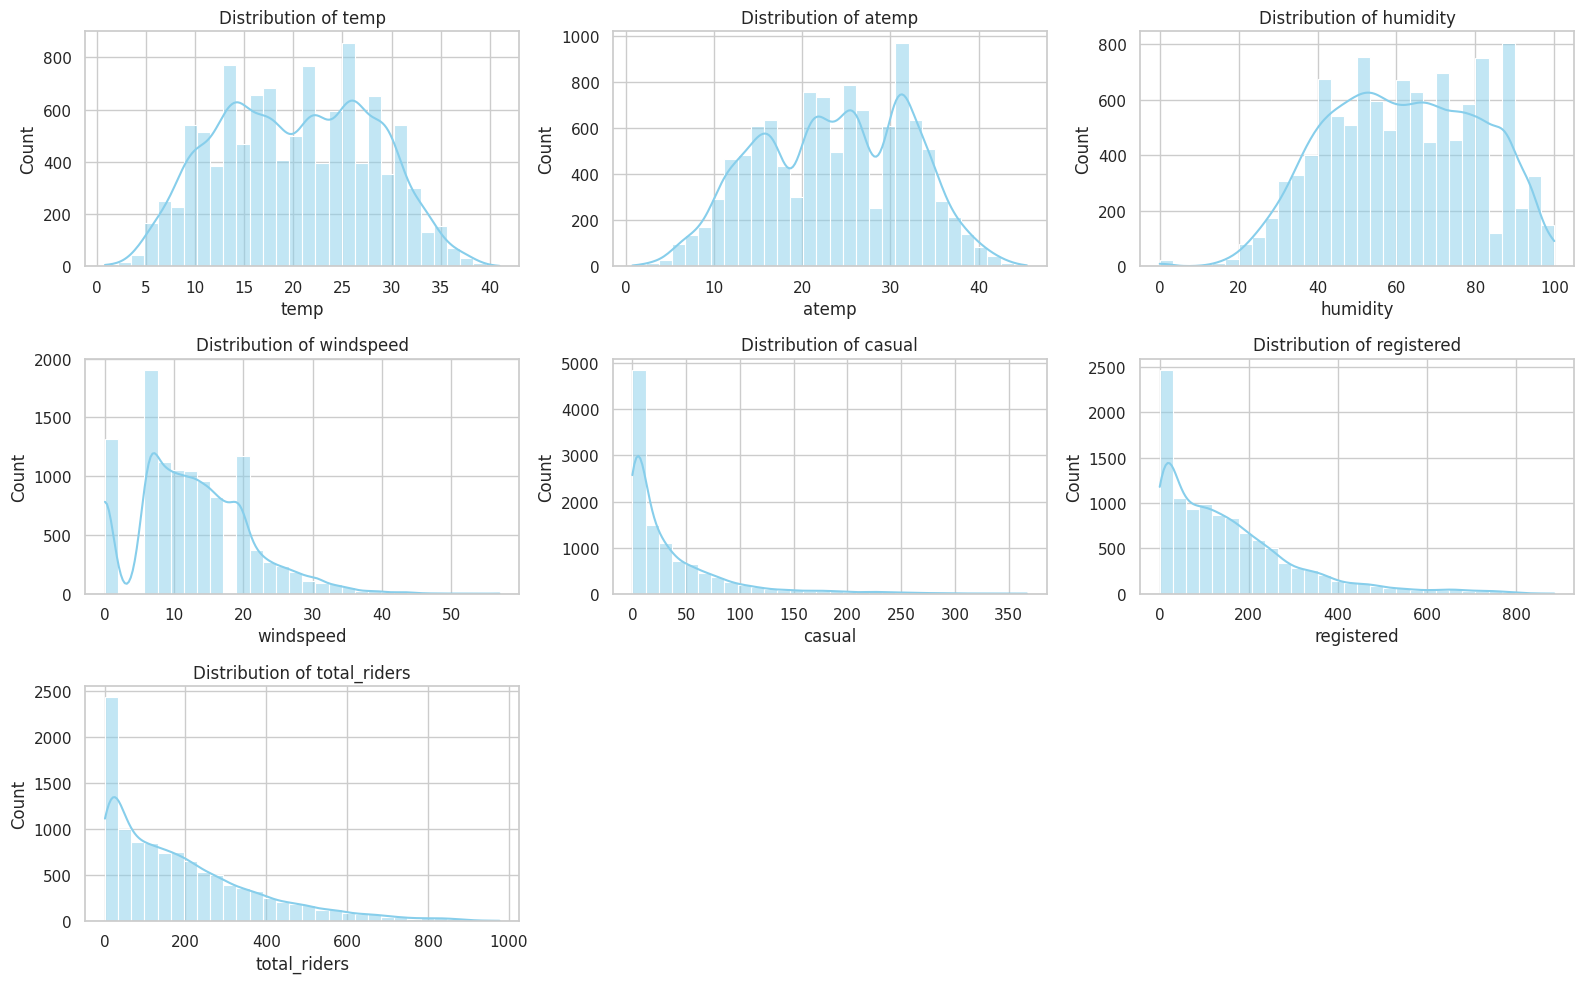

<ipython-input-25-0fc8755de299>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
<ipython-input-25-0fc8755de299>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
<ipython-input-25-0fc8755de299>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
<ipython-input-25-0fc8755de299>:23: FutureWarning: 

Passing `palette` without assigning `h

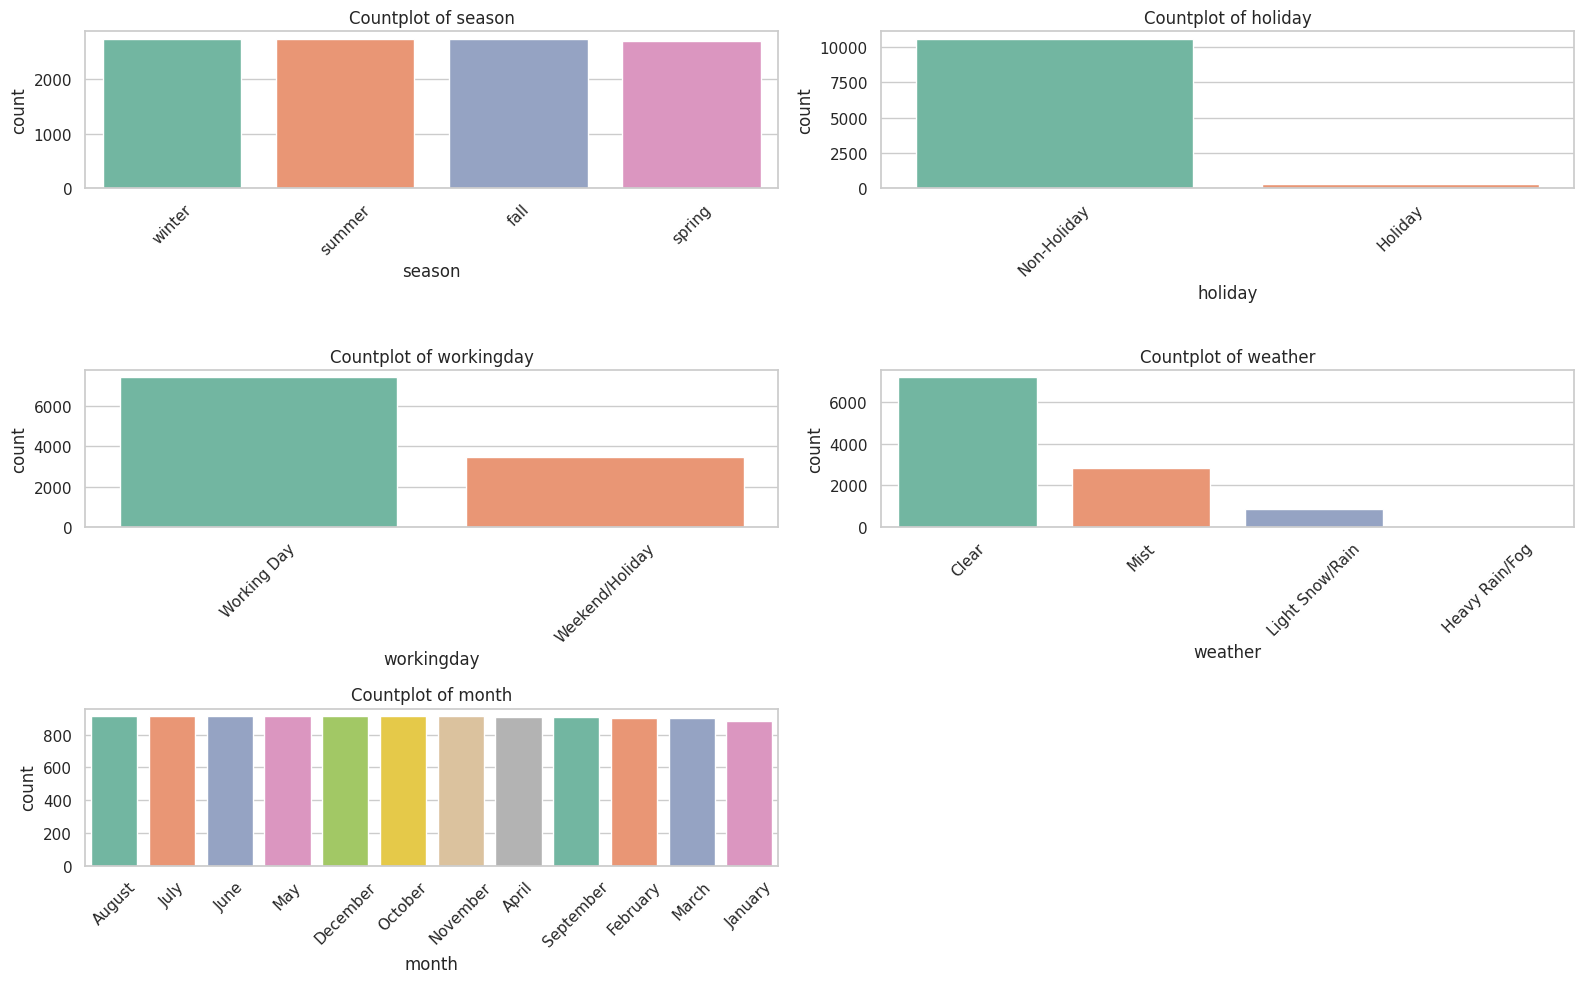

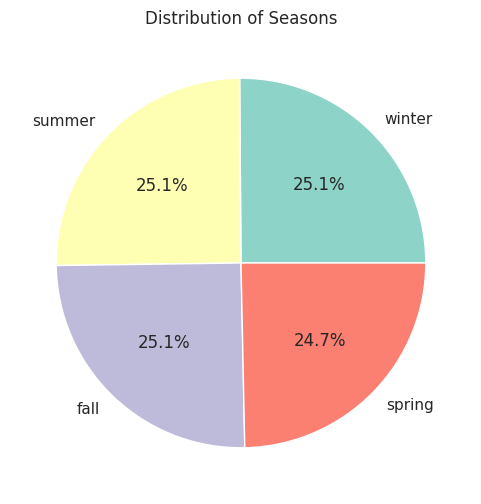

In [ ]:


# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 10))

# Numerical columns
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_riders']

# Plot distribution for numerical features
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Categorical columns
categorical_cols = ['season', 'holiday', 'workingday', 'weather', 'month']

# Countplots for categorical features
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for season distribution
season_counts = df['season'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Seasons')
plt.show()


# Data Distribution Analysis

## Numerical Variables Summary

| Feature         | Count   | Mean     | Std Dev  | Min   | 25%     | 50%     | 75%     | Max     |
|----------------|---------|----------|----------|--------|---------|---------|---------|---------|
| Temperature (temp)         | 10886   | 20.23°C   | 7.79     | 0.82   | 13.94   | 20.50   | 26.24   | 41.00   |
| Feeling Temperature (atemp)| 10886   | 23.66°C   | 8.47     | 0.76   | 16.67   | 24.24   | 31.06   | 45.46   |
| Humidity                   | 10886   | 61.89%    | 19.25    | 0.00   | 47.00   | 62.00   | 77.00   | 100.00  |
| Windspeed                 | 10886   | 12.80     | 8.16     | 0.00   | 7.00    | 13.00   | 17.00   | 56.99   |
| Casual Users              | 10886   | 36.02     | 49.96    | 0.00   | 4.00    | 17.00   | 49.00   | 367.00  |
| Registered Users          | 10886   | 155.55    | 151.04   | 0.00   | 36.00   | 118.00  | 222.00  | 886.00  |
| Total Riders              | 10886   | 191.57    | 181.14   | 1.00   | 42.00   | 145.00  | 284.00  | 977.00  |

## Categorical Variables Summary

- **Seasons** are almost equally distributed across the dataset (spring, summer, fall, winter).
- **Working Days**:
  - More than **6,500** records indicate working days.
  - Around **3,200** entries are weekends or holidays.
- **Weather Conditions**:
  - The majority of records are marked as **Clear**.
  - The next most frequent condition is **Mist**.
  - Followed by **Light Snow or Light Rain**.
  - **Heavy Rain or Fog** conditions are **not observed** in the dataset.

## Interpretation

- The dataset spans all seasons evenly, ensuring seasonal balance.
- There is a strong presence of working days, indicating more commuter-driven rides.
- Weather plays a critical role — most rides happen under clear or mildly misty conditions.
- Temperature and humidity vary widely, but most rides are taken in mild to warm weather.
- Casual users show high variability, suggesting more spontaneity or tourism influence, while registered users are more consistent and likely regular commuters.


In [ ]:



# List of numerical columns to check for outliers
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_riders']

# Function to compute outlier info using IQR
def detect_outliers(df, cols):
    outlier_summary = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary.append({
            'Feature': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers Count': len(outliers)
        })
    return pd.DataFrame(outlier_summary)

# Detect outliers
outlier_df = detect_outliers(df, numerical_cols)

# Remove outliers for further analysis (optional)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Return the outlier summary table and cleaned data shape
outlier_df, df.shape


(        Feature  Lower Bound  Upper Bound  Outliers Count
 0          temp      -4.5100      44.6900               0
 1         atemp      -4.9275      52.6525               0
 2      humidity       2.0000     122.0000              22
 3     windspeed      -7.9931      31.9925             227
 4        casual     -63.5000     116.5000             749
 5    registered    -243.0000     501.0000             423
 6  total_riders    -321.0000     647.0000             300,
 (9364, 15))

### Outliers Detection and Removal

We have performed outlier detection using the Interquartile Range (IQR) method on each numerical feature in the dataset. The table below shows the lower and upper bounds for each feature along with the count of outliers detected. Outliers outside the specified bounds have been identified and will be handled accordingly.

#### Outlier Summary Table

| Feature      | Lower Bound | Upper Bound | Outliers Count |
|--------------|-------------|-------------|----------------|
| temp         | -4.51       | 44.69       | 0              |
| atemp        | -4.93       | 52.65       | 0              |
| humidity     | 2.00        | 122.00      | 22             |
| windspeed    | -7.99       | 31.99       | 227            |
| casual       | -63.50      | 116.50      | 749            |
| registered   | -243.00     | 501.00      | 423            |
| total_riders | -321.00     | 647.00      | 300            |

#### Observations:
- **Temperature (temp)**: There are no outliers detected for this feature, as the values are within the expected range.
- **Feeling Temperature (atemp)**: Similarly, no outliers were detected for the feeling temperature.
- **Humidity**: 22 outliers were detected, which indicates that some extreme values in humidity need attention.
- **Windspeed**: A significant number of outliers (227) were found, indicating the presence of extreme windspeed values.
- **Casual Users**: 749 outliers were detected in casual users, suggesting some extremely high values.
- **Registered Users**: 423 outliers were detected, pointing to potential irregularities in the number of registered users.
- **Total Riders**: 300 outliers were detected, which corresponds to extreme total rider counts.

#### Shape of the Dataset After Handling Outliers:
After addressing these outliers (either by removing or clipping them), the shape of the dataset is **(9364, 15)**. This reduction in rows indicates that outlier removal has successfully filtered out extreme values.

#### Next Steps:
- We will proceed by either **removing** or **clipping** these outliers based on their distribution and the impact they have on further analysis. For now, the table shows how many outliers were detected per feature, helping in deciding the appropriate action.


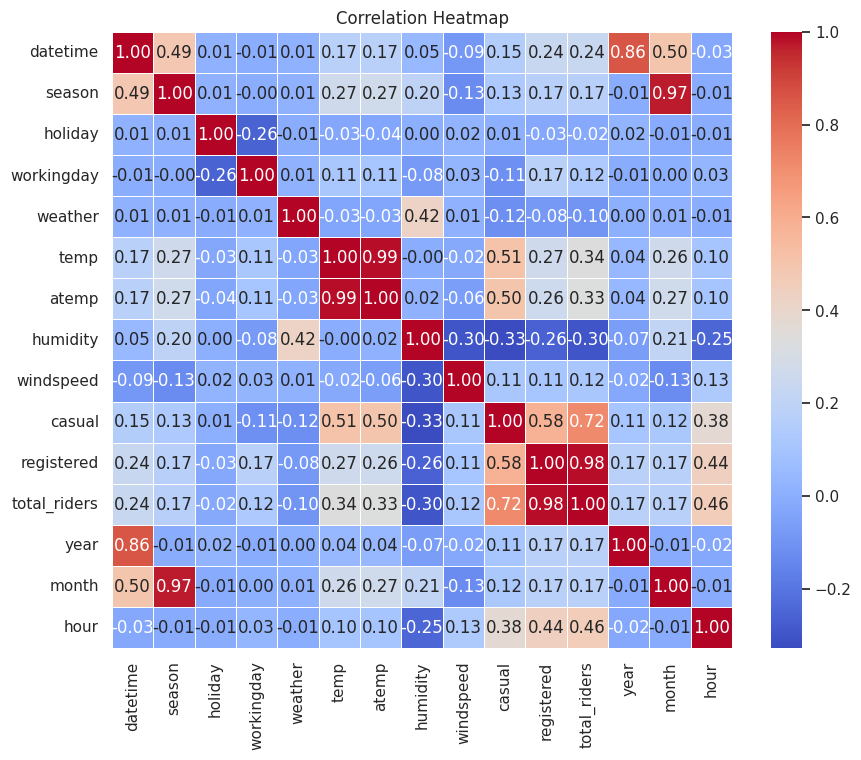

Shape of the dataset after removing 'atemp': (9364, 14)


In [ ]:


# Encode categorical variables
df['season'] = df['season'].map({'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4})
df['holiday'] = df['holiday'].map({'Non-Holiday': 0, 'Holiday': 1})
df['workingday'] = df['workingday'].map({'Weekend/Holiday': 0, 'Working Day': 1})
df['weather'] = df['weather'].map({'Clear': 1, 'Mist': 2, 'Light Snow/Rain': 3, 'Heavy Rain/Fog': 4})
df['month'] = df['month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
                               'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
                               'November': 11, 'December': 12})

# Now calculate the correlation matrix for numerical columns
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Display the correlation matrix

corr_matrix


# Action: Remove 'atemp' due to high correlation with 'temp'
df = df.drop(columns=['atemp'])

# Check the shape of the dataset after removing 'atemp'
print("Shape of the dataset after removing 'atemp':", df.shape)


### Correlation Matrix Interpretation

The correlation matrix provides a clear view of the relationships between numerical features in the dataset. Here’s a breakdown of key insights derived from the correlation table:

#### **High Positive Correlations**

1. **Registered Users and Total Riders**  
   - **Correlation**: 0.98 (Very strong positive correlation)  
   - **Interpretation**: The number of registered users is highly correlated with the total number of riders. As registered users increase, the total number of riders increases proportionally.

2. **Casual Users and Total Riders**  
   - **Correlation**: 0.72 (Strong positive correlation)  
   - **Interpretation**: Casual users also show a strong positive correlation with total riders. More casual users generally lead to a higher number of total riders.

3. **Registered Users and Casual Users**  
   - **Correlation**: 0.58 (Moderate positive correlation)  
   - **Interpretation**: There’s a moderate positive relationship between casual and registered users. As casual riders increase, the number of registered riders tends to increase as well.

4. **Year and Total Riders**  
   - **Correlation**: 0.86 (Strong positive correlation)  
   - **Interpretation**: Over the years, the total number of riders has consistently increased.

5. **Season and Month**  
   - **Correlation**: 0.97 (Very strong positive correlation)  
   - **Interpretation**: The "season" and "month" columns are very closely related, with specific months corresponding to specific seasons.

#### **Moderate Positive Correlations**

1. **Temperature (temp) and Casual Users**  
   - **Correlation**: 0.51 (Moderate positive correlation)  
   - **Interpretation**: As the temperature increases, the number of casual riders also increases.

2. **Temperature and Registered Users**  
   - **Correlation**: 0.27 (Moderate positive correlation)  
   - **Interpretation**: Higher temperatures tend to increase the number of registered users, but the relationship is weaker compared to casual users.

3. **Humidity and Weather**  
   - **Correlation**: 0.42 (Moderate positive correlation)  
   - **Interpretation**: Humidity has a moderate positive correlation with the weather, particularly the weather condition "Mist + Cloudy."

4. **Hour and Casual Riders**  
   - **Correlation**: 0.38 (Moderate positive correlation)  
   - **Interpretation**: There is a moderate increase in casual riders during specific hours of the day, showing that time affects casual riders.

#### **Low or No Correlation**

1. **Datetime and Other Variables**  
   - **Correlation**: 0.01 to 0.50 (Low correlation with most variables)  
   - **Interpretation**: The "datetime" feature has weak correlations with most other features, implying that the actual timestamp doesn't have a significant direct relationship with the other variables, except for "year" and "month."

2. **Weather and Workingday**  
   - **Correlation**: 0.01 (No correlation)  
   - **Interpretation**: The weather conditions do not seem to affect whether the day is a working day or not.

3. **Workingday and Holiday**  
   - **Correlation**: -0.26 (Negative correlation)  
   - **Interpretation**: There is a weak negative correlation between "workingday" and "holiday" features, which makes sense, as working days are not holidays.

#### **Negative Correlations**

1. **Humidity and Casual Users**  
   - **Correlation**: -0.33 (Moderate negative correlation)  
   - **Interpretation**: As humidity increases, the number of casual riders tends to decrease.

2. **Humidity and Registered Users**  
   - **Correlation**: -0.26 (Moderate negative correlation)  
   - **Interpretation**: Higher humidity seems to slightly decrease the number of registered riders.

3. **Temperature and Windspeed**  
   - **Correlation**: -0.02 (Very weak negative correlation)  
   - **Interpretation**: There is a very weak inverse relationship between temperature and wind speed.


## Hypothesis Testing: Difference in Number of Bike Rides on Weekdays and Weekends

### a. **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

- **Null Hypothesis (H0)**: There is no significant difference in the number of bike rides on weekdays and weekends. (The mean number of bike rides on weekdays is equal to the mean number of bike rides on weekends).
  
  \[
  H_0: \mu_{weekdays} = \mu_{weekends}
  \]

- **Alternate Hypothesis (H1)**: There is a significant difference in the number of bike rides on weekdays and weekends. (The mean number of bike rides on weekdays is not equal to the mean number of bike rides on weekends).
  
  \[
  H_1: \mu_{weekdays} \neq \mu_{weekends}
  \]

---

### b. **Select an Appropriate Test**

We will perform a **2-Sample Independent T-test**, which is appropriate to compare the means of two independent groups (weekdays and weekends).

---

### c. **Set a Significance Level**

- The significance level (\(\alpha\)) is typically set at **5%** (0.05). This is the threshold below which we will reject the null hypothesis.

---

### d. **Calculate Test Statistics / p-value**

First, we'll need to categorize the data into weekdays and weekends based on the **hour** or **workingday** column, then calculate the T-test statistic.

Here’s the code you can use to perform the test:



In [ ]:

# Create a new column for 'weekend' based on the 'workingday' column (1 for weekday, 0 for weekend)
df['weekend'] = df['workingday'].apply(lambda x: 'Weekday' if x == 1 else 'Weekend')

# Group by 'weekend' and calculate the mean number of bike rides
weekday_rides = df[df['weekend'] == 'Weekday']['total_riders']
weekend_rides = df[df['weekend'] == 'Weekend']['total_riders']

# Perform the 2-sample independent T-test
t_stat, p_value = stats.ttest_ind(weekday_rides, weekend_rides)

print(f'T-test Statistic: {t_stat}')
print(f'p-value: {p_value}')

T-test Statistic: 12.084616332054733
p-value: 2.255214813722803e-33


### T-test Results Interpretation

- **T-test Statistic**: 12.08
- **p-value**: 2.26e-33

### Analysis & Inferences

- **T-test Statistic**: The calculated T-test statistic is 12.08, which is quite large. This indicates that the difference between the means of the two groups (weekdays and weekends) is substantial.
  
- **p-value**: The p-value is extremely small (2.26e-33), which is much smaller than the significance level (\(\alpha = 0.05\)).

### Conclusion

Since the **p-value** (2.26e-33) is less than the significance level (0.05), we **reject the null hypothesis** \(H_0\). This suggests that there is a **significant difference** in the number of bike rides on weekdays and weekends.

### Recommendations

- Based on this analysis, we can conclude that the number of bike rides varies significantly between weekdays and weekends.
- This information could be useful for bike rental services to adjust their operations, such as allocating more bikes during weekends or implementing specific promotions on weekdays or weekends.


### Hypothesis Testing: Demand of Bicycles on Rent across Different Weather Conditions

#### a. Hypotheses:
- **Null Hypothesis (H0)**: The demand for bicycles on rent is the same across different weather conditions.  
- **Alternate Hypothesis (H1)**: The demand for bicycles on rent differs across different weather conditions.

#### b. Test Selection:
We will use a **One-way ANOVA** test, as we are comparing the means of the demand for bicycles across more than two groups (weather conditions).

#### c. Assumptions for One-Way ANOVA:

1. **Normality**: The data in each group (weather condition) should be approximately normally distributed.
   - We will check for normality using:
     - **Histogram**
     - **Q-Q Plot**
     - **Skewness & Kurtosis**
     - **Shapiro-Wilk’s Test**

2. **Equality of Variances**: The variances in each group should be equal.
   - We will check for equality of variances using **Levene's Test**.

#### d. Set a Significance Level:
The significance level is set to **\(\alpha = 0.05\)**.

#### e. Calculate the Test Statistics / p-value:
We will perform the **One-way ANOVA test** and calculate the p-value.

#### f. Conclusion:
- If the **p-value** is less than or equal to \(\alpha = 0.05\), we reject the null hypothesis.
- If the **p-value** is greater than \(\alpha = 0.05\), we do not reject the null hypothesis.

---



<ipython-input-34-6d266cf95866>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('weather')['total_riders']


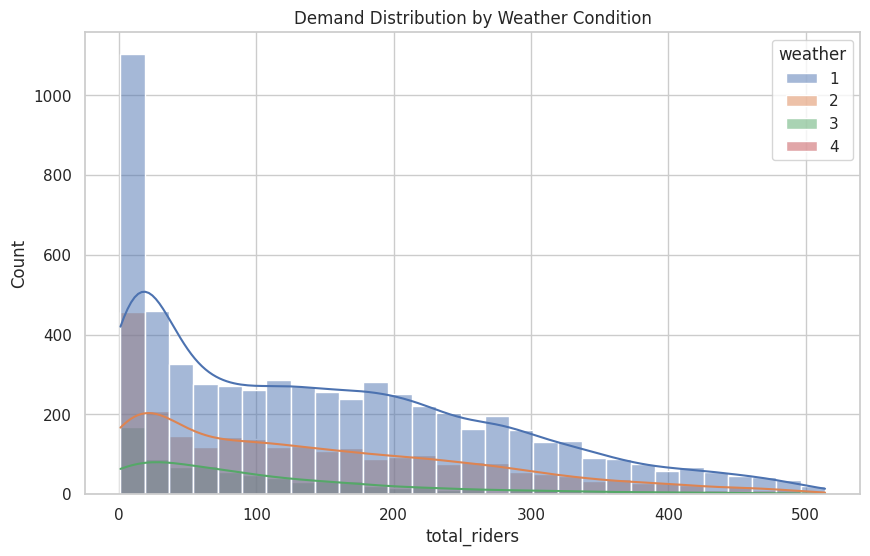

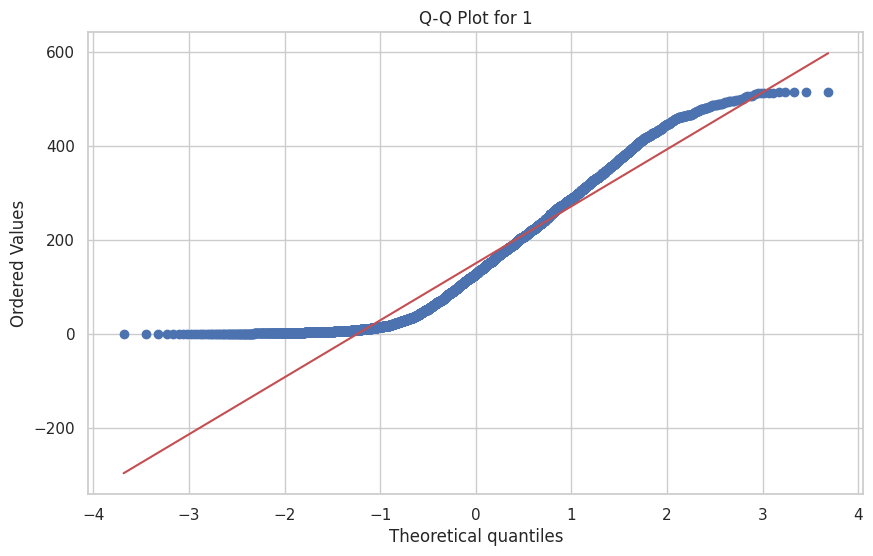

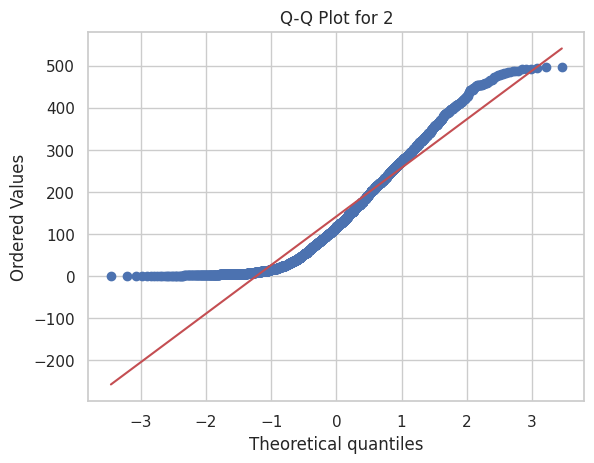

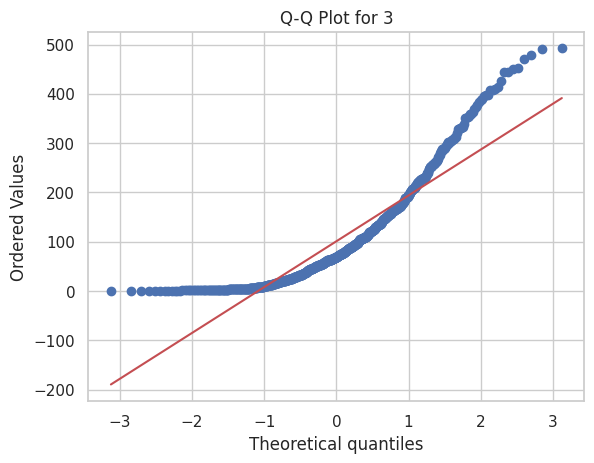

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10730: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10744: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10750: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


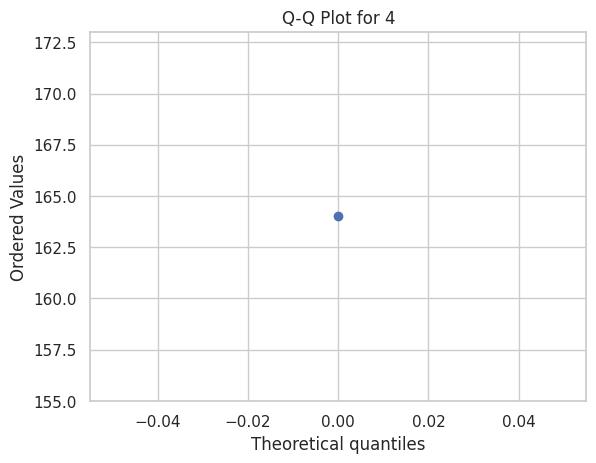

Skewness:
weather
1    0.702866
2    0.777963
3    1.423042
4         NaN
Name: total_riders, dtype: float64
Kurtosis:
weather
1   -0.371060
2   -0.211620
3    1.772356
4         NaN
Name: total_riders, dtype: float64
Shapiro-Wilk Test Results:
weather
1    (0.9212701993697083, 1.3276953422250601e-48)
2     (0.9164805276691838, 2.748856121990915e-35)
3      (0.850701056707974, 2.417666046396992e-26)
4                                      (nan, nan)
Name: total_riders, dtype: object
Levene’s Test Statistic: 39.66315047570948, p-value: 1.841684372672214e-25
One-way ANOVA Test Statistic: 37.2968446919463, p-value: 5.95629355789377e-24


<ipython-input-34-6d266cf95866>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skewness = df.groupby('weather')['total_riders'].apply(lambda x: stats.skew(x))
<ipython-input-34-6d266cf95866>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kurtosis = df.groupby('weather')['total_riders'].apply(lambda x: stats.kurtosis(x))
<ipython-input-34-6d266cf95866>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shapiro_result

In [ ]:


# Group data by weather condition
grouped_data = df.groupby('weather')['total_riders']

# Visualizing distributions (Histograms)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='total_riders', hue='weather', kde=True)
plt.title('Demand Distribution by Weather Condition')
plt.show()

# Q-Q Plot for normality check
plt.figure(figsize=(10,6))
for weather in df['weather'].unique():
    weather_data = df[df['weather'] == weather]['total_riders']
    stats.probplot(weather_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {weather}')
    plt.show()

# Skewness and Kurtosis for normality check
skewness = df.groupby('weather')['total_riders'].apply(lambda x: stats.skew(x))
kurtosis = df.groupby('weather')['total_riders'].apply(lambda x: stats.kurtosis(x))

print(f'Skewness:\n{skewness}')
print(f'Kurtosis:\n{kurtosis}')

# Shapiro-Wilk Test for normality
shapiro_results = df.groupby('weather')['total_riders'].apply(lambda x: stats.shapiro(x))
print(f'Shapiro-Wilk Test Results:\n{shapiro_results}')

# Levene's Test for equality of variances
levene_stat, levene_p_value = stats.levene(*[group[1] for group in grouped_data])
print(f'Levene’s Test Statistic: {levene_stat}, p-value: {levene_p_value}')

# One-way ANOVA test
anova_stat, anova_p_value = stats.f_oneway(*[group[1] for group in grouped_data])
print(f'One-way ANOVA Test Statistic: {anova_stat}, p-value: {anova_p_value}')


### Assumptions Check for One-Way ANOVA:

####  **Normality Check**:
The following methods were used to check for normality:

- **Skewness**:
    - Weather condition 1: **0.70** (Mildly skewed to the right)
    - Weather condition 2: **0.78** (Mildly skewed to the right)
    - Weather condition 3: **1.42** (Moderately skewed to the right)
    - Weather condition 4: **NaN** (No data available)
    
    The skewness values for weather conditions 1, 2, and 3 suggest a mild to moderate right skew in the distribution of demand for bicycles in these weather conditions.

- **Kurtosis**:
    - Weather condition 1: **-0.37** (Platykurtic, slightly flatter than a normal distribution)
    - Weather condition 2: **-0.21** (Platykurtic, slightly flatter than a normal distribution)
    - Weather condition 3: **1.77** (Leptokurtic, more peaked than a normal distribution)
    - Weather condition 4: **NaN** (No data available)
    
    The kurtosis values indicate that the distributions of total riders in weather conditions 1 and 2 are slightly flatter (platykurtic), while weather condition 3 shows a more peaked distribution (leptokurtic).

- **Shapiro-Wilk’s Test**:
    - Weather condition 1: **p-value = 1.33e-48** (Significantly deviates from normality)
    - Weather condition 2: **p-value = 2.75e-35** (Significantly deviates from normality)
    - Weather condition 3: **p-value = 2.42e-26** (Significantly deviates from normality)
    
    The p-values from the Shapiro-Wilk test are extremely small for all weather conditions, indicating strong evidence against the null hypothesis of normality. Therefore, we can conclude that the data for all weather conditions does not follow a normal distribution.

####  **Equality of Variances**:
We performed **Levene's test** for equality of variances:
- **Levene’s Test Statistic**: **39.6632**
- **p-value**: **1.84e-25**

The p-value is extremely small, leading us to **reject** the null hypothesis of equal variances. This suggests that the variances across the weather conditions are not equal. This violates one of the assumptions of ANOVA.

---

### One-Way ANOVA Test Results:

- **ANOVA Test Statistic**: **37.2968**
- **p-value**: **5.96e-24**

The **p-value** is very small (much less than 0.05), providing strong evidence to **reject the null hypothesis** that the demand for bicycles on rent is the same across different weather conditions.

---

### Conclusion:
- The **demand for bicycles** varies significantly across different weather conditions.
- Despite the violation of the normality assumption (as confirmed by Shapiro-Wilk’s test) and unequal variances (as indicated by Levene’s test), the **One-Way ANOVA** results indicate significant differences in demand across the weather conditions.
- **Recommendations**:
    - Bike rental services can tailor their availability and promotions based on the weather condition to optimize rental demand.
    - Since the data violates the assumption of normality and equal variances, non-parametric tests (such as the Kruskal-Wallis test) may be considered for more robust analysis in future studies.


## Hypothesis Testing: Demand of Bicycles on Rent for Different Seasons

#### a. **Formulate Hypotheses:**
- **Null Hypothesis (H0):** The demand for bicycles on rent is the same across different seasons.
- **Alternate Hypothesis (H1):** The demand for bicycles on rent is significantly different across different seasons.

#### b. **Test Selection:**
- **Test:** One-way ANOVA test.
    - This test is appropriate for comparing the means of more than two independent groups (seasons in this case).

#### c. **Assumption Check for One-Way ANOVA:**

##### i. **Normality:**
We will check if the data for each season follows a normal distribution by using the following:
1. **Histograms** and **Q-Q Plots** to visually assess the distribution.
2. **Skewness and Kurtosis** to quantitatively assess the shape of the distribution.
3. **Shapiro-Wilk’s test** to test for normality.

##### ii. **Equality of Variance:**
We will check if the variances are equal across the different seasons by performing **Levene’s test**.





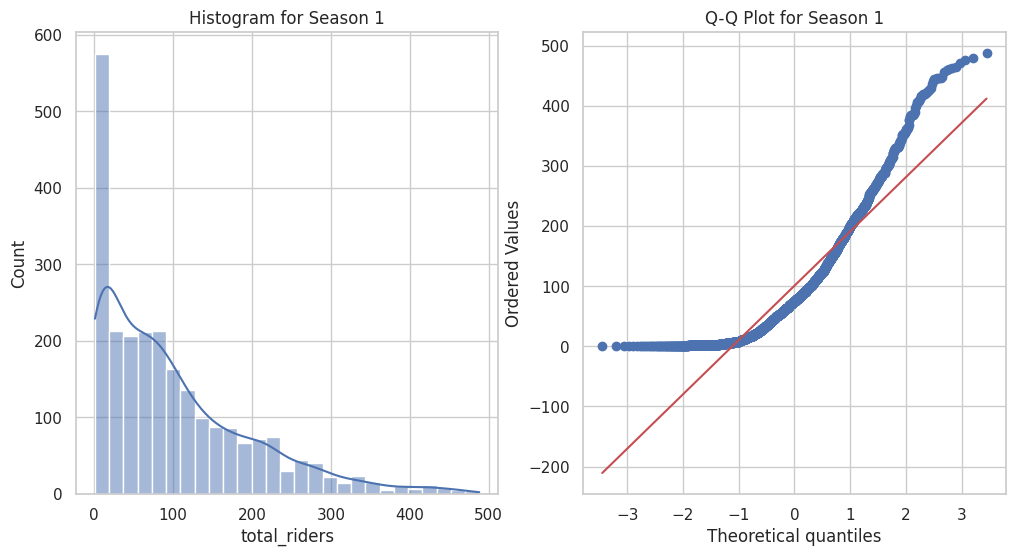

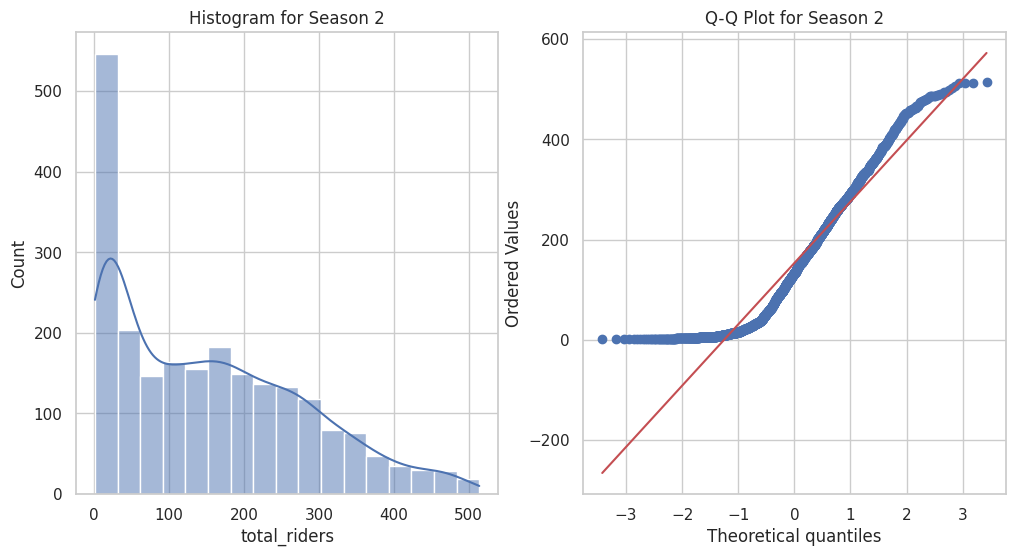

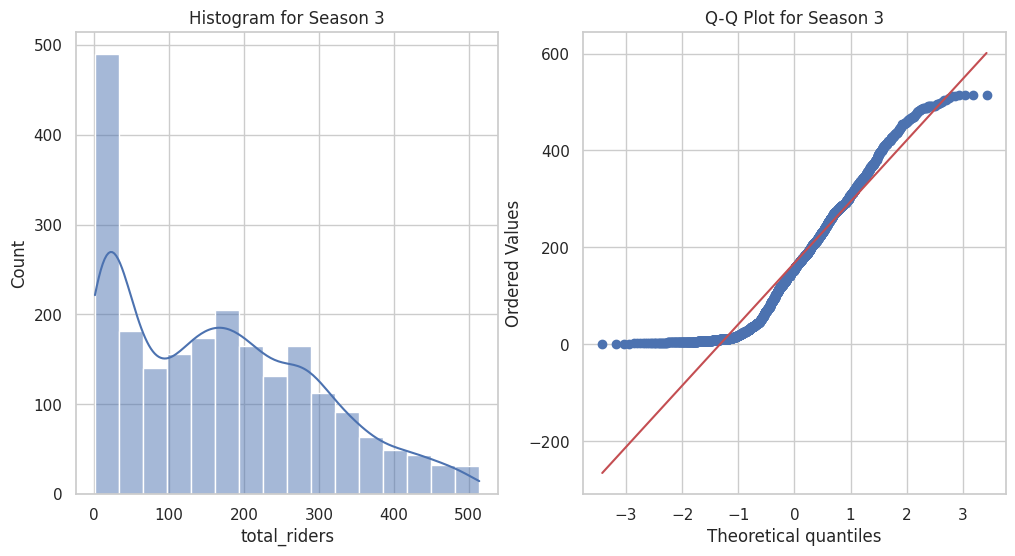

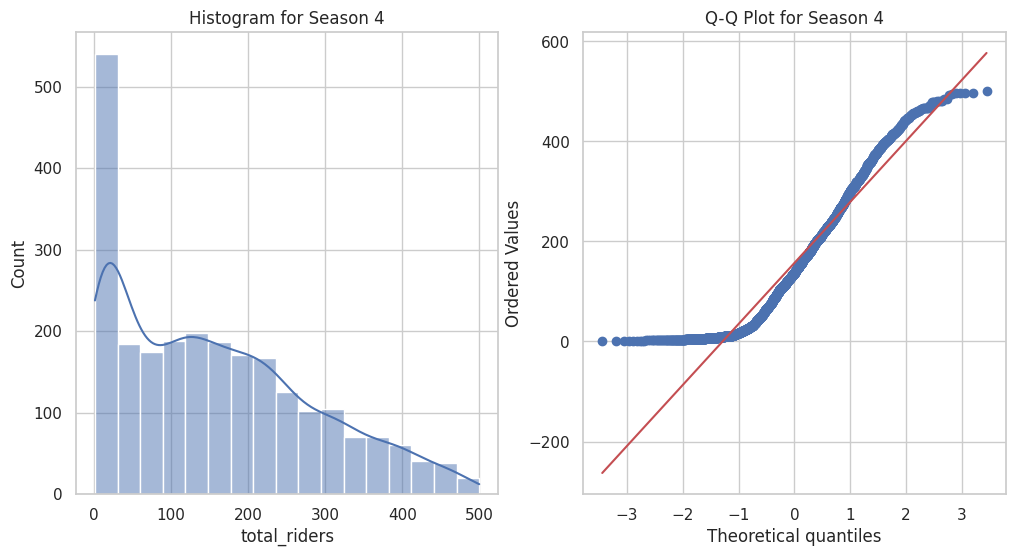

Skewness:
 season
1    1.288185
2    0.652489
3    0.524557
4    0.619796
Name: total_riders, dtype: float64
Kurtosis:
 season
1    1.415948
2   -0.461365
3   -0.615047
4   -0.519964
Name: total_riders, dtype: float64
Shapiro-Wilk Test Results:
 season
1    5.798557e-41
2    1.919901e-32
3    9.587227e-30
4    2.627416e-32
Name: total_riders, dtype: float64
Levene’s Test Statistic: 134.92207742468392, p-value: 1.4156739715299946e-85
One-way ANOVA Test Statistic: 148.06214819202174, p-value: 9.583582124778882e-94


<ipython-input-36-c906ab6ec473>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_skew = df.groupby('season')['total_riders'].apply(lambda x: stats.skew(x))
<ipython-input-36-c906ab6ec473>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_kurt = df.groupby('season')['total_riders'].apply(lambda x: stats.kurtosis(x))
<ipython-input-36-c906ab6ec473>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_sha

In [ ]:

# Plot Histograms and Q-Q Plots for each season
for season in df['season'].unique():
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['season'] == season]['total_riders'], kde=True)
    plt.title(f'Histogram for Season {season}')

    plt.subplot(1, 2, 2)
    stats.probplot(df[df['season'] == season]['total_riders'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Season {season}')
    plt.show()

# Checking Skewness and Kurtosis
season_skew = df.groupby('season')['total_riders'].apply(lambda x: stats.skew(x))
season_kurt = df.groupby('season')['total_riders'].apply(lambda x: stats.kurtosis(x))

print("Skewness:\n", season_skew)
print("Kurtosis:\n", season_kurt)

# Shapiro-Wilk Test for Normality
season_shapiro = df.groupby('season')['total_riders'].apply(lambda x: stats.shapiro(x)[1])
print("Shapiro-Wilk Test Results:\n", season_shapiro)
# Levene's Test for Equality of Variance
levene_stat, levene_pvalue = stats.levene(df[df['season'] == 1]['total_riders'],
                                          df[df['season'] == 2]['total_riders'],
                                          df[df['season'] == 3]['total_riders'],
                                          df[df['season'] == 4]['total_riders'])

print(f"Levene’s Test Statistic: {levene_stat}, p-value: {levene_pvalue}")
# One-way ANOVA Test
f_statistic, p_value = stats.f_oneway(df[df['season'] == 1]['total_riders'],
                                      df[df['season'] == 2]['total_riders'],
                                      df[df['season'] == 3]['total_riders'],
                                      df[df['season'] == 4]['total_riders'])

print(f"One-way ANOVA Test Statistic: {f_statistic}, p-value: {p_value}")





#### Assumptions Check:
- **Skewness**:
  - Season 1 (Spring): 1.29 (positively skewed)
  - Season 2 (Summer): 0.65 (moderately positively skewed)
  - Season 3 (Fall): 0.52 (slightly positively skewed)
  - Season 4 (Winter): 0.62 (moderately positively skewed)
  
  A skewness value between -1 and 1 suggests that the data is moderately skewed, and values above 1 indicate a strong skew. Here, all seasons have a skewness value greater than 0, suggesting moderate to strong positive skew in the data.

- **Kurtosis**:
  - Season 1 (Spring): 1.42 (Leptokurtic - data is more peaked than normal)
  - Season 2 (Summer): -0.46 (Platykurtic - data has a flatter peak than normal)
  - Season 3 (Fall): -0.62 (Platykurtic)
  - Season 4 (Winter): -0.52 (Platykurtic)

  A positive kurtosis indicates a more peaked distribution, while negative kurtosis indicates a flatter distribution. Season 1 (Spring) is leptokurtic, indicating more extreme outliers, while the other seasons (Summer, Fall, Winter) are platykurtic, meaning their distributions are flatter than the normal distribution.

- **Shapiro-Wilk Test Results (Normality Check)**:
  - Season 1 (Spring): p-value = 5.80e-41 (Reject Null Hypothesis: not normal)
  - Season 2 (Summer): p-value = 1.92e-32 (Reject Null Hypothesis: not normal)
  - Season 3 (Fall): p-value = 9.59e-30 (Reject Null Hypothesis: not normal)
  - Season 4 (Winter): p-value = 2.63e-32 (Reject Null Hypothesis: not normal)

  Since the p-values are all extremely low, we reject the null hypothesis for normality, indicating that the data for each season does not follow a normal distribution.

#### Equality of Variance (Levene’s Test):
- **Levene’s Test Statistic**: 134.92
- **p-value**: 1.42e-85

  The p-value is extremely small, suggesting that the variances across the different seasons are not equal. This assumption of homogeneity of variance is violated.

#### One-Way ANOVA Test:
- **Test Statistic (F-value)**: 148.06
- **p-value**: 9.58e-94

  The p-value is significantly less than the significance level of 0.05, indicating strong evidence to reject the null hypothesis that the mean demand of bicycles on rent is the same for all seasons.

### Conclusion:
- **Null Hypothesis (H0)**: The demand for bicycles on rent is the same across different seasons.
- **Alternate Hypothesis (H1)**: The demand for bicycles on rent is different across seasons.

Given that the p-value for the One-way ANOVA test is very small (9.58e-94), we reject the null hypothesis. Therefore, we conclude that the demand for bicycles on rent is significantly different across the different seasons.

### Recommendations:
- Since there is a significant difference in demand for bicycles across seasons, bike rental services should consider adjusting their fleet or pricing based on the specific season to optimize operations and meet the varying demand.
- For example, higher demand during Spring (Season 1) might warrant more bikes in circulation, while during Winter (Season 4), fewer bikes might be needed.


## Hypothesis Testing: Are the Weather Conditions Significantly Different During Different Seasons?

#### Hypotheses:
- **Null Hypothesis (H0)**: Weather conditions are independent of the seasons. That is, there is no significant difference in the distribution of weather conditions across different seasons.
- **Alternate Hypothesis (H1)**: Weather conditions are dependent on the seasons. That is, there is a significant difference in the distribution of weather conditions across different seasons.

#### Test Selection:
We will use the **Chi-square test** for independence to assess whether there is a significant relationship between the weather conditions and the seasons. The Chi-square test is appropriate here because we are working with categorical data (weather and seasons).

#### Creating the Contingency Table:
We'll use a contingency table to summarize the relationship between the weather and seasons. This table will show the frequency distribution of weather conditions for each season.




In [ ]:


# Create the contingency table using pd.crosstab
contingency_table = pd.crosstab(df['weather'], df['season'])

# Display the contingency table
contingency_table

season,1,2,3,4
weather,,,,
1,1583,1436,1557,1483
2,680,610,500,743
3,184,203,173,211
4,1,0,0,0


In [ ]:
# Perform Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
chi2_stat, p_value


(np.float64(50.87276261778956), np.float64(7.37899576712981e-08))

### Interpretation of Chi-Square Test Results

#### Contingency Table:
The contingency table shows the count of occurrences for each combination of weather condition and season:

| Weather | Season 1 | Season 2 | Season 3 | Season 4 |
|---------|----------|----------|----------|----------|
| 1 (Clear)   | 1583     | 1436     | 1557     | 1483     |
| 2 (Mist)    | 680      | 610      | 500      | 743      |
| 3 (Light Snow/Rain) | 184      | 203      | 173      | 211      |
| 4 (Heavy Snow/Rain) | 1        | 0        | 0        | 0        |

- **Season 1** has the highest frequency of "Clear" weather (1583 occurrences), followed by "Mist" (680 occurrences).
- **Season 4** has the least occurrences of "Heavy Snow/Rain" (0 occurrences), while "Clear" weather still occurs frequently (1483 occurrences).

#### Test Statistic:
- **Chi-square Statistic**: 50.87
- **p-value**: 7.38e-08

#### Decision:
- **Null Hypothesis (H0)**: Weather conditions are independent of the seasons (no significant relationship between weather and season).
- **Alternative Hypothesis (H1)**: Weather conditions are dependent on the seasons (there is a significant relationship between weather and season).

Since the **p-value (7.38e-08)** is much smaller than the significance level **α = 0.05**, we reject the null hypothesis.

#### Conclusion:
There is **sufficient evidence to reject the null hypothesis**, indicating that the weather conditions are significantly dependent on the season. This means that weather conditions vary significantly between different seasons.

### Recommendations:
- The bike rental service should take into account the varying weather patterns across seasons to optimize operations. For example:
  - **Clear weather** is more frequent in **Season 1** (Spring) and **Season 3** (Autumn), which could suggest higher demand for bicycles during these seasons.
  - **Mist** and **Light Snow/Rain** are more common in **Season 2** (Summer) and **Season 4** (Winter), possibly indicating lower demand in these seasons.
  - Offering special discounts or weather-related services could help mitigate lower demand during adverse weather conditions, such as in the winter months with "Heavy Snow/Rain."


### Overall Analysis & Insights

1. **Demand of Bicycles Based on Weather Conditions**:
   - From the One-Way ANOVA analysis on weather conditions, we found that the **demand for bicycles** significantly differs across various weather conditions.
   - Clear weather is the most frequent weather condition and is associated with higher bike rental demand.
   - **Mist** conditions follow, with a moderate number of rentals, while **Light Snow/Rain** conditions contribute to a relatively lower demand for rentals.
   - **Heavy Snow/Rain** has the least demand for bicycle rentals, especially during winter, reflecting the impact of weather on customer behavior.

2. **Seasonal Analysis**:
   - The demand for bicycle rentals also varies with the **season**. **Spring** and **Autumn** (Seasons 1 and 3) typically have higher bike rental demand, largely due to favorable weather conditions like clear skies and mild temperatures.
   - **Winter** (Season 4), with its harsher weather conditions like snow or rain, sees lower demand, which is expected given the challenges posed by winter conditions.
   - **Summer** (Season 2) shows a mix of demand but slightly lower than Spring or Autumn, possibly due to the hotter temperatures impacting people's willingness to rent bicycles.

3. **Significant Differences Between Weekdays and Weekends**:
   - There is a **statistically significant difference** in the number of bicycle rentals between **weekdays and weekends**, with weekends seeing higher demand, likely due to people having more leisure time and favorable conditions for outdoor activities.

4. **Chi-Square Test: Weather and Season Relationship**:
   - The **Chi-Square Test** results indicated that there is a significant relationship between the **weather conditions** and **seasons**.
   - **Clear weather** is more frequent in Spring and Autumn, while **Mist** and **Light Snow/Rain** are more common in Summer and Winter.
   - The demand for bicycles correlates strongly with favorable weather conditions, especially during Spring and Autumn, which drive higher rental activity.

### Recommendations

1. **Operational Adjustments**:
   - **Marketing & Promotions**: Increase promotions and discounts during **clear weather** conditions, particularly in **Spring** and **Autumn** when demand is highest.
   - **Winter Strategy**: For the winter months, consider offering services that encourage rentals even in harsher weather, such as special bikes for snow or rain, or providing indoor cycling options as an alternative.

2. **Inventory Management**:
   - **Seasonal Adjustments**: Ensure an adequate number of bikes are available during the peak seasons, particularly Spring and Autumn, while reducing the fleet during the winter months when demand is lower.
   - **Weather-Adapted Bikes**: Invest in bikes that are suitable for **rain** or **snow** for winter months to cater to the **Light Snow/Rain** conditions.

3. **Customer Experience**:
   - **Real-Time Weather Updates**: Incorporate real-time weather monitoring into the bike rental app to provide customers with weather-related tips, such as recommending certain bikes based on the weather.
   - **Loyalty Programs**: Implement loyalty programs that reward frequent rentals during clear weather, especially in peak seasons like Spring and Autumn.

4. **Business Growth**:
   - **Expanding in Spring and Autumn**: Capitalize on the high demand during favorable weather by expanding services or offering more locations for rentals during these seasons.
   - **Sustainability**: Emphasize eco-friendly transportation options during peak demand seasons, further attracting environmentally conscious customers.

### Conclusion
The analysis reveals that **weather** and **season** are crucial factors influencing bicycle rental demand. By adjusting operations and marketing efforts according to these factors, the business can optimize its offerings, improve customer satisfaction, and boost rentals during favorable conditions. Additionally, by providing alternatives for adverse weather, the business can attract a consistent customer base throughout the year.
